# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [1]:
import pandas as pd
import numpy as np
from cmath import *
import matplotlib.pyplot as plt

In [53]:
def psi_1(x, **kwargs):
    L = 10e-8
    x0 = L/2
    sigma = 1.0e-10
    kappa = 5.0e10
    return exp(-((x-x0)**2)/(2*sigma**2))*exp(1j*kappa*x)

In [54]:
N = 1000
L = 10.0e-8
x_pos = np.linspace(0,L,N,complex)
psi_0 = np.zeros(N, complex)

In [55]:
psi_0

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

In [56]:
for i in range(N):
    psi_0[i] = psi_1(x_pos[i])

In [57]:
psi_0

array([ 0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
       -0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
       -0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
       -0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
       -0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
        0.00000000e+000-0.00000000e+000j,
       -0.00000000e+000+0.00000000

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


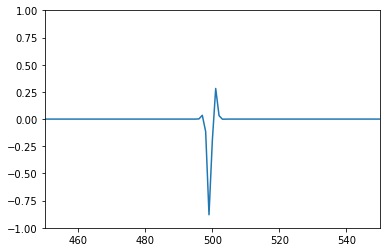

In [58]:
plt.plot(psi_0)
plt.xlim(450,550)
plt.ylim(-1.0,1.0)
plt.show()

In [59]:
B = np.zeros((N,N), complex)
print(B)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [60]:
h = 10.0e-18
m = 9.109e-31
a = L/N
hbar = 1.055e-34
b1 = 1 - h*(1j*hbar)/(2*m*a**2)
b2 = h*(1j*hbar)/(4*m*a**2)

In [61]:
A = np.zeros((N,N), complex)
a1 = 1 + h*(1j*hbar)/(2*m*a**2)
a2 = -h*(1j*hbar)/(4*m*a**2)
print(A)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [63]:
for i in range(0,N-1):
    B[i][i]=b1
    B[i][i+1]=b2
    B[i+1][i]=b2
    B[i+1][i+1]=b1
    A[i][i]=a1
    A[i][i+1]=a2
    A[i+1][i]=a2
    A[i+1][i+1]=a1
print(A)
print(B)

[[ 1.+0.05790976j -0.-0.02895488j  0.+0.j         ...  0.+0.j
   0.+0.j          0.+0.j        ]
 [-0.-0.02895488j  1.+0.05790976j -0.-0.02895488j ...  0.+0.j
   0.+0.j          0.+0.j        ]
 [ 0.+0.j         -0.-0.02895488j  1.+0.05790976j ...  0.+0.j
   0.+0.j          0.+0.j        ]
 ...
 [ 0.+0.j          0.+0.j          0.+0.j         ...  1.+0.05790976j
  -0.-0.02895488j  0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.j         ... -0.-0.02895488j
   1.+0.05790976j -0.-0.02895488j]
 [ 0.+0.j          0.+0.j          0.+0.j         ...  0.+0.j
  -0.-0.02895488j  1.+0.05790976j]]
[[1.-0.05790976j 0.+0.02895488j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.02895488j 1.-0.05790976j 0.+0.02895488j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.02895488j 1.-0.05790976j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j         ... 1.-0.05790976j
  0.+0.02895488j 0.+0.j        ]
 [0.+0.j         0.

In [64]:
v = np.matmul(B, psi_0)
new_psi = np.linalg.solve(A, v)

In [65]:
new_psi

array([ 0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000e+000j,
        0.00000000e+000+0.00000000

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


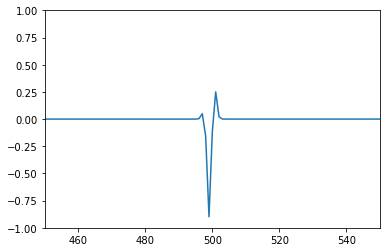

In [66]:
plt.plot(new_psi)
plt.xlim(450,550)
plt.ylim(-1,1)
plt.show()

In [67]:
time_steps = 500
psi_iter = np.copy(new_psi)
new_psi_iter = []
psi_series = []

for i1 in range(time_steps):
    v = np.matmul(B, psi_iter)
    new_psi_iter = np.linalg.solve(A, v)
    psi_series.append(new_psi_iter)
    psi_iter, new_psi_iter = new_psi_iter , psi_iter

In [68]:
psi_series_2 = np.copy(psi_series)

In [73]:
plt.plot(psi_series_2[450])
plt.xlim(450,550)
plt.ylim(-1.0,1.0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


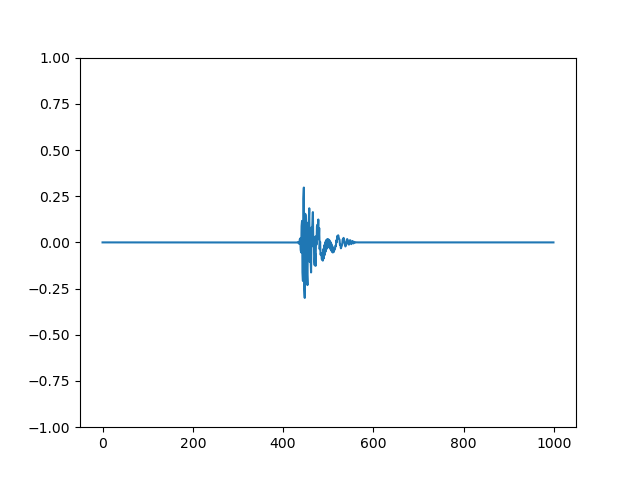

In [74]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def onClick(event):
    global pause
    pause ^= True
    
def animate(i3):
    ax.clear()
    ax.plot(psi_series_2[i3*10])
    ax.set_ylim([-1.0,1.0])

ani = FuncAnimation(fig, animate, frames=(time_steps//10)-1, interval=1, repeat=False)
plt.show()

In [17]:
# from matplotlib.animation import PillowWriter
# ani.save('animation_drawing1.gif', writer=PillowWriter(fps=30), dpi=300)